In [1]:
import pandas as pd

In [11]:
df=pd.read_csv('/content/drive/MyDrive/amazon_products_dataset.csv')
df

,title,brand,category,actual_price,discount_price,rating,rating_count
0,Smart Fitness Watch,Dell,Laptop,69890.0,65271.0,2.6,2128.0
1,Laptop with SSD Storage,LG,Smartwatch,66771.0,63977.0,2.5,9118.0
2,High Resolution Monitor,Mi,Headphones,43598.0,39679.0,1.9,2517.0
3,4K Action Camera,HP,Camera,63408.0,58877.0,3.7,17533.0
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0
...,...,...,...,...,...,...,...
1995,Smartphone with AMOLED Display,Dell,Monitor,24140.0,20202.0,3.0,16058.0
1996,Smart Fitness Watch,LG,Headphones,65449.0,64559.0,1.1,6655.0
1997,4K Action Camera,Dell,Smartphone,21358.0,18654.0,3.7,5308.0
1998,Noise Cancelling Earbuds,OnePlus,Smartwatch,35229.0,31061.0,2.2,19105.0


In [3]:
df.isnull().sum()

,0
title,0
brand,0
category,2
actual_price,2
discount_price,1
rating,4
rating_count,4


In [6]:
# Task 2 — Clean the Dataset
# Identify missing values using .isnull().sum().
# Fill missing numeric values (discount_price, rating, etc.) using mean or median.
# Fill missing categorical values (brand, category) with "Unknown".
# Remove all duplicate rows.
# Convert numeric columns to their correct data types.
# Reset index after cleaning.


In [7]:
df['discount_price'].fillna(df['discount_price'].mean(),inplace=True)
df['rating'].fillna(df['rating'].mean(),inplace=True)

/tmp/ipython-input-829038862.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['discount_price'].fillna(df['discount_price'].mean(),inplace=True)
/tmp/ipython-input-829038862.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [8]:
df['brand'].fillna('Unknown',inplace=True)
df['category'].fillna('Unknown',inplace=True)

/tmp/ipython-input-3525328964.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['brand'].fillna('Unknown',inplace=True)
/tmp/ipython-input-3525328964.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [9]:
# Task 3 — Data Analysis
# Identify the top 5 most expensive products (actual_price).
# Find the brand with the highest number of products.
# Compute the average discount percentage for each brand.
# Identify products with rating ≥ 4.5 and rating_count ≥ 2000.
# Compute category-wise average price.


In [12]:
actual_price=df.groupby('category')['actual_price'].mean().sort_values(ascending=False)
actual_price

,actual_price
category,
Laptop,40822.874477
Camera,40352.246094
Monitor,39950.747212
Tablet,39943.815217
Speaker,39683.795276
Headphones,39576.147679
Smartwatch,38316.913934
Smartphone,37909.529412


In [13]:
highest_brand=df['brand'].value_counts().idxmax()
highest_brand

'Boat'

In [15]:
Average=df.groupby('brand')['discount_price'].mean()
Average

,discount_price
brand,
Apple,35889.731579
Boat,36353.115888
Dell,37570.078531
HP,38354.180583
JBL,37380.390821
LG,35108.571154
Mi,36542.437569
OnePlus,39090.550490
Samsung,37937.254412


In [16]:
products=df[(df['rating']>=4.5) & (df['rating_count']>=2000)]
products

,title,brand,category,actual_price,discount_price,rating,rating_count
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0
32,4K Action Camera,OnePlus,Smartphone,7793.0,5953.0,4.6,5066.0
51,Wireless Bluetooth Headphones,Dell,Headphones,61569.0,59372.0,4.5,13402.0
52,Laptop with SSD Storage,Boat,Smartwatch,76286.0,75621.0,5.0,7433.0
59,Gaming Laptop,Samsung,Tablet,45250.0,44710.0,4.7,4643.0
...,...,...,...,...,...,...,...
1949,Portable Bluetooth Speaker,OnePlus,Tablet,59325.0,55777.0,4.5,19070.0
1970,Android Tablet,Boat,Camera,20841.0,17765.0,4.5,10252.0
1975,Wireless Bluetooth Headphones,Samsung,Smartwatch,31973.0,27058.0,4.5,4288.0
1982,Wireless Bluetooth Headphones,HP,Camera,15343.0,10814.0,4.5,7851.0


In [17]:
category_price=df.groupby('category')['actual_price'].mean()
category_price

,actual_price
category,
Camera,40352.246094
Headphones,39576.147679
Laptop,40822.874477
Monitor,39950.747212
Smartphone,37909.529412
Smartwatch,38316.913934
Speaker,39683.795276
Tablet,39943.815217


In [18]:
# Task 4 — Programming Task: Feature Engineering + Logical Filters
# Task 4A — Create New Columns
# Write code to create:
# discount_percent = ((actual_price - discount_price) / actual_price) * 100
# price_category based on:
# actual_price < 500 → "Budget"
# 500 ≤ price < 2000 → "Midrange"
# price ≥ 2000 → "Premium"
# popularity_score = rating * log(rating_count + 1)
# Task 4B — Filtering Using New Columns
# Using the newly created columns:
# Show top 10 highest popularity_score products.
# Show all Premium category items with discount_percent > 40%.
# Show all products whose title contains "Bluetooth" (string filter).
# Show products where:
# rating >= 4.0
# discount_percent between 20% to 50%
# popularity_score in the top 30% percentile
# (Use .between() and .quantile())
# Task 4C — Grouping with New Columns
# Find the average discount_percent for each brand.
# Find the average popularity_score for each price_category.
# Identify which category offers the highest average discount.
# Calculate total revenue potential per brand using:
# revenue_potential = actual_price * rating_count


In [19]:
discount_percent=((df['actual_price']-df['discount_price'])/df['actual_price'])*100

In [21]:
import numpy as np
popularity_score=df['rating']*np.log(df['rating_count']+1)

In [24]:
# Show top 10 highest popularity_score products.
df['discount_percent']=discount_percent
df['popularity_score']=popularity_score
df.sort_values(by='popularity_score',ascending=False).head(10)

,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percent,popularity_score
1418,Smartphone with AMOLED Display,OnePlus,Laptop,22786.0,22301.0,5.0,18510.0,2.128500,49.130602
297,Portable Bluetooth Speaker,Samsung,Camera,52713.0,48399.0,5.0,17776.0,8.183939,48.928304
502,Wireless Bluetooth Headphones,Samsung,Camera,17858.0,14713.0,5.0,16732.0,17.611155,48.625690
1400,High Resolution Monitor,Dell,Headphones,11025.0,8407.0,5.0,15958.0,23.746032,48.388891
878,Laptop with SSD Storage,Apple,Smartwatch,4436.0,2614.0,4.9,18895.0,41.073039,48.248857
1489,High Resolution Monitor,Apple,Laptop,21711.0,20325.0,4.9,18862.0,6.383861,48.240292
848,High Resolution Monitor,HP,Smartphone,11660.0,9248.0,4.9,18547.0,20.686106,48.157775
854,Portable Bluetooth Speaker,Samsung,Smartwatch,19284.0,14650.0,4.9,18109.0,24.030284,48.040676
1625,Gaming Laptop,Dell,Tablet,15099.0,12224.0,5.0,14322.0,19.040996,47.848110
637,4K Action Camera,Dell,Headphones,35058.0,33177.0,4.9,17254.0,5.365394,47.803700


In [27]:
# Show all Premium category items with discount_percent > 40%.
df[(df['category']=='Premium') & (df['discount_percent']>40)]


,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percent,popularity_score


In [28]:
# Show all products whose title contains "Bluetooth" (string filter).
products=df[df['title'].str.contains('Bluetooth')]
products

,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percent,popularity_score
14,Portable Bluetooth Speaker,OnePlus,Camera,25516.0,24050.0,1.7,16989.0,5.745415,16.558646
18,Portable Bluetooth Speaker,Sony,Monitor,73590.0,69414.0,3.8,9759.0,5.674684,34.906981
21,Wireless Bluetooth Headphones,Samsung,Speaker,78689.0,76240.0,2.9,10196.0,3.112252,26.766562
23,Portable Bluetooth Speaker,HP,Smartwatch,4342.0,4235.0,1.4,4820.0,2.464302,11.873031
25,Wireless Bluetooth Headphones,Boat,Monitor,14689.0,13286.0,3.7,1849.0,9.551365,27.834881
...,...,...,...,...,...,...,...,...,...
1975,Wireless Bluetooth Headphones,Samsung,Smartwatch,31973.0,27058.0,4.5,4288.0,15.372345,37.637140
1979,Wireless Bluetooth Headphones,Sony,Monitor,65124.0,61923.0,3.3,16581.0,4.915239,32.063041
1982,Wireless Bluetooth Headphones,HP,Camera,15343.0,10814.0,4.5,7851.0,29.518347,40.358356
1985,Wireless Bluetooth Headphones,Mi,Smartwatch,50527.0,45694.0,2.8,3692.0,9.565183,22.999744


In [29]:
# Show products where:
# rating >= 4.0
# discount_percent between 20% to 50%
# popularity_score in the top 30% percentile
# (Use .between() and .quantile())

df[(df['rating']>=4.0) & (df['discount_percent'].between(20,50)) & (df['popularity_score']>=df['popularity_score'].quantile(0.7))]

,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percent,popularity_score
32,4K Action Camera,OnePlus,Smartphone,7793.0,5953.0,4.6,5066.0,23.610933,39.240319
94,Smart Fitness Watch,HP,Monitor,16289.0,12756.0,4.4,19798.0,21.689484,43.530902
107,High Resolution Monitor,JBL,Smartphone,7308.0,4789.0,4.3,19050.0,34.469075,42.375962
140,Gaming Laptop,Sony,Tablet,11869.0,8696.0,5.0,3124.0,26.733507,40.235948
162,Android Tablet,Apple,Speaker,11918.0,8193.0,4.6,14639.0,31.255244,44.120959
165,Wireless Bluetooth Headphones,Apple,Smartwatch,7654.0,4236.0,4.3,15314.0,44.656389,41.437328
188,Portable Bluetooth Speaker,LG,Smartphone,10227.0,5248.0,4.4,19440.0,48.684854,43.450614
215,Wireless Bluetooth Headphones,Apple,Camera,16855.0,12030.0,4.9,13597.0,28.626520,46.636622
274,Smartphone with AMOLED Display,Sony,Speaker,6770.0,5282.0,4.9,15245.0,21.979321,47.197155
404,Portable Bluetooth Speaker,Samsung,Laptop,14978.0,11330.0,4.4,14550.0,24.355722,42.175826


In [30]:
# Task 4C — Grouping with New Columns
# Find the average discount_percent for each brand.
df.groupby('brand')['discount_percent'].mean()


,discount_percent
brand,
Apple,12.721996
Boat,12.546502
Dell,11.165004
HP,11.501202
JBL,11.370137
LG,11.559797
Mi,10.162308
OnePlus,11.380987
Samsung,10.805965


In [31]:
# Find the average popularity_score for each price_category.
df.groupby('category')['popularity_score'].mean()

,popularity_score
category,
Camera,26.612233
Headphones,26.109701
Laptop,26.480516
Monitor,26.549790
Smartphone,26.676324
Smartwatch,25.722448
Speaker,25.378141
Tablet,26.989892


In [32]:
# Identify which category offers the highest average discount.
df.groupby('category')['discount_percent'].mean().idxmax()

'Headphones'

In [34]:
# Calculate total revenue potential per brand using:
# revenue_potential = actual_price * rating_count

df['revenue_potential']=df['actual_price']*df['rating_count']
df.groupby('brand')['revenue_potential'].sum()

,revenue_potential
brand,
Apple,6.663722e+10
Boat,7.695298e+10
Dell,7.549826e+10
HP,8.297444e+10
JBL,7.723438e+10
LG,7.992613e+10
Mi,7.698029e+10
OnePlus,8.247380e+10
Samsung,8.117230e+10


In [35]:
# Task 5 — Data Visualization
# Use the specific plot type mentioned:
# Price distribution → Histogram + KDE
# Relationship between price and rating → Scatter Plot
# Category-wise average rating → Bar Plot
# Brand product count → Count Plot
# Numeric feature correlations → Heatmap

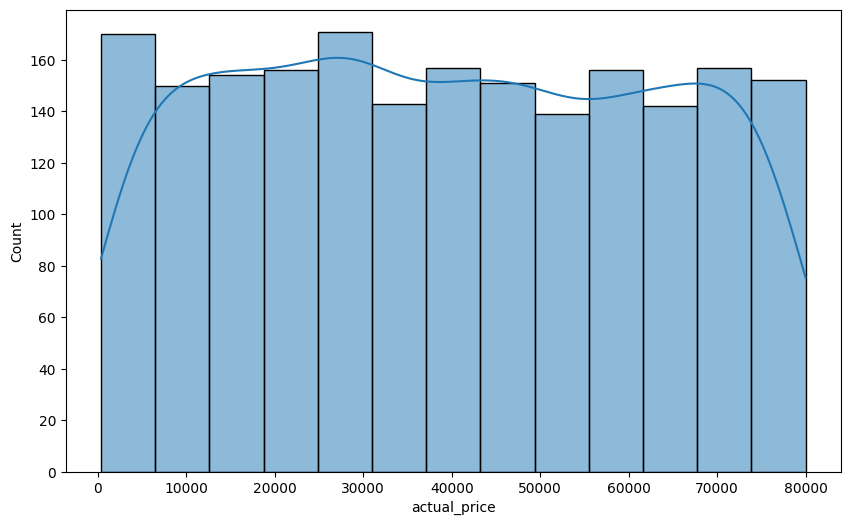

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(df['actual_price'],kde=True)
plt.show()

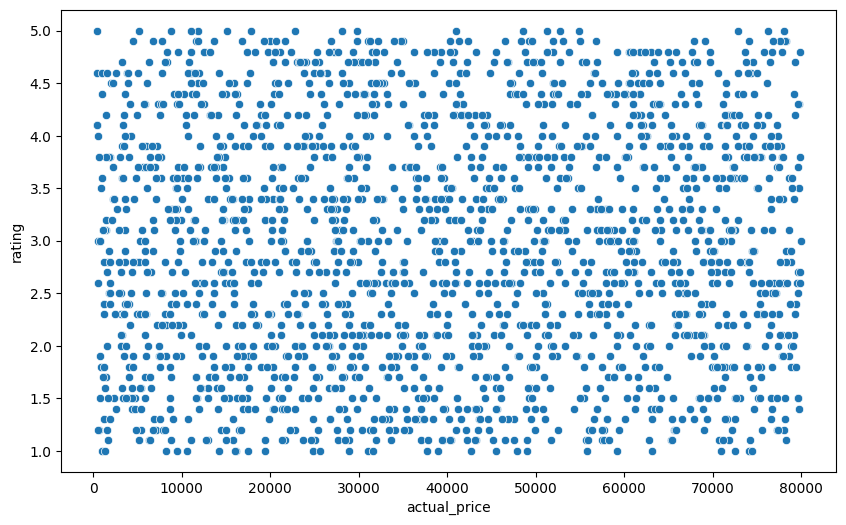

In [38]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='actual_price',y='rating')
plt.show()

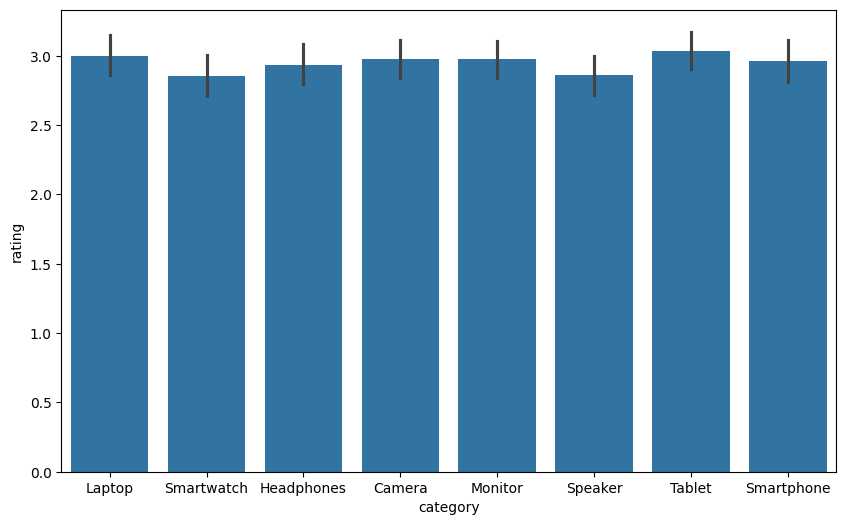

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x='category',y='rating')
plt.show()

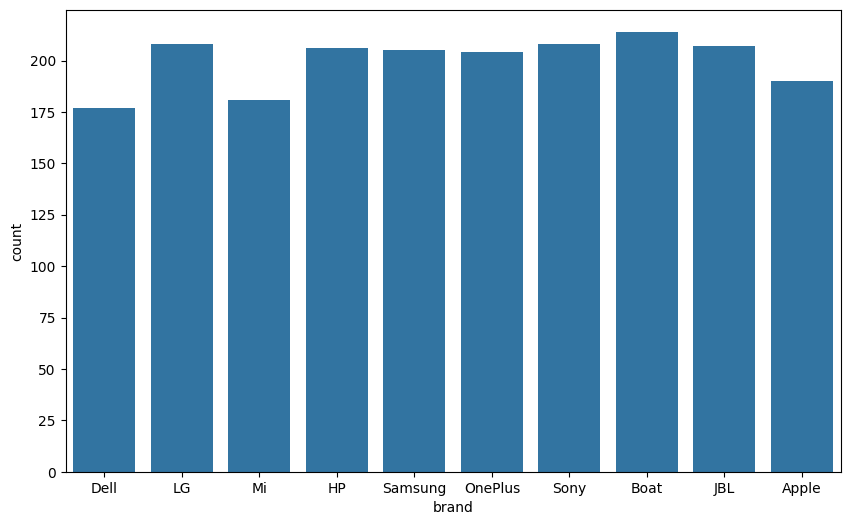

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='brand')
plt.show()

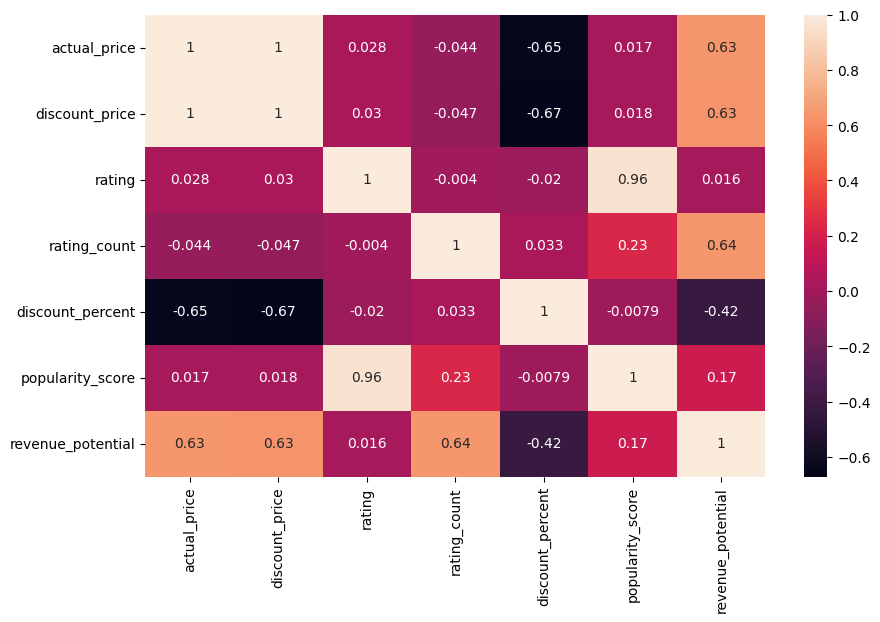

In [43]:
# Numeric feature correlations → Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(),annot=True)
plt.show()

In [48]:
df.to_csv('/content/drive/MyDrive/amazon_electronics_eda.csv', index=False)